In [ ]:
!git clone https://github.com/doublemul/ADER.git

Cloning into 'ADER'...
remote: Enumerating objects: 825, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 825 (delta 19), reused 0 (delta 0), pack-reused 783 (from 1)
Receiving objects: 100% (825/825), 30.93 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (476/476), done.


In [ ]:
%cd /content

/content


In [ ]:
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [12]:
import pandas as pd
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [13]:
df.shape

(100000, 4)

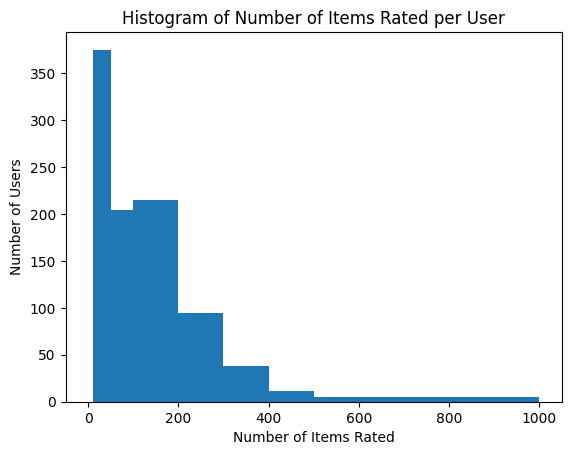

In [14]:
# Using dataframe df: Find total number of items rated per user and plot a histogram with customized bins (taking a list as input)

# Group by user_id and count the number of items rated
user_item_counts = df.groupby('user_id')['item_id'].count()

# Define custom bins for the histogram
bins = [0, 5, 10, 50, 100, 200, 300, 400, 500, 1000]

# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(user_item_counts, bins=bins)

# Add labels and title
plt.xlabel('Number of Items Rated')
plt.ylabel('Number of Users')
plt.title('Histogram of Number of Items Rated per User')

# Display the plot
plt.show()

In [15]:
# Group by user_id and count the number of ratings
user_ratings_count = df.groupby('user_id')['rating'].count()

# Filter out users with only one rating
filtered_users = user_ratings_count[user_ratings_count > 5].index

# Filter the original DataFrame to include only the filtered users
filtered_df = df[df['user_id'].isin(filtered_users)]

In [16]:
# Group by item_id and count the number of ratings
movie_ratings_count = filtered_df.groupby('item_id')['rating'].count()

# Filter out movies with less than 5 ratings
filtered_movies = movie_ratings_count[movie_ratings_count >= 5].index

# Filter the DataFrame to include only the filtered movies
filtered_df = filtered_df[filtered_df['item_id'].isin(filtered_movies)]

In [17]:
filtered_df

user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[99287 rows x 4 columns]

In [18]:
user_session = filtered_df.groupby('user_id')['item_id'].apply(set).reset_index().loc[:,['item_id']].values.reshape(-1)

In [19]:
all_item = set(filtered_df['item_id'].unique())
print(all_item)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

In [20]:
num_item = len(filtered_df['item_id'].unique())

In [21]:
item_id = filtered_df['item_id'].unique()
item_id_map = {item_id[i] : i for i in range(num_item)}

In [22]:
num_user = len(filtered_df['user_id'].unique())
user_id = filtered_df['user_id'].unique()
num_event = len(filtered_df)
user_id_map = {user_id[i] : i for i in range(num_user)}
training_data = filtered_df.loc[:,['user_id','item_id']].values
training_data = [[user_id_map[training_data[i][0]],item_id_map[training_data[i][1]]] for i in range(num_event)]




In [23]:
# negative sampling data collection
import random
sample_dict = {}
train_sample_size = 10

for td in training_data:
    if td[0]>=len(user_session):
      continue
    sample_dict[tuple(td)] = [item_id_map[s] for s in random.sample(all_item.difference(user_session[td[0]]) , train_sample_size)]

print(sample_dict)


<ipython-input-23-c3fa44092a84>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_dict[tuple(td)] = [item_id_map[s] for s in random.sample(all_item.difference(user_session[td[0]]) , train_sample_size)]


{(0, 0): [399, 769, 1079, 89, 688, 392, 521, 354, 81, 540], (1, 1): [823, 446, 156, 1138, 1245, 430, 1131, 540, 251, 221], (2, 2): [806, 575, 603, 228, 647, 865, 562, 325, 990, 943], (3, 3): [1254, 923, 765, 549, 454, 761, 734, 395, 1263, 41], (4, 4): [1177, 593, 1154, 728, 473, 977, 551, 953, 1207, 1164], (5, 5): [244, 942, 494, 878, 1229, 924, 19, 1106, 927, 820], (6, 6): [916, 1337, 165, 1234, 129, 821, 1314, 589, 1321, 428], (7, 7): [10, 1165, 1299, 333, 725, 1295, 1216, 572, 671, 511], (8, 8): [203, 854, 292, 494, 1253, 562, 780, 182, 1069, 93], (9, 9): [348, 664, 928, 1320, 1279, 470, 1053, 155, 26, 1346], (10, 10): [16, 950, 1202, 1100, 15, 345, 1148, 614, 155, 654], (11, 11): [345, 673, 512, 946, 1342, 1142, 648, 1115, 1281, 269], (12, 12): [1120, 1081, 379, 537, 1096, 1018, 787, 929, 608, 927], (13, 13): [1335, 681, 1114, 917, 851, 765, 1269, 249, 453, 992], (14, 14): [138, 576, 232, 1065, 1093, 58, 848, 1145, 115, 1281], (15, 15): [1206, 985, 379, 1250, 299, 295, 272, 583, 69

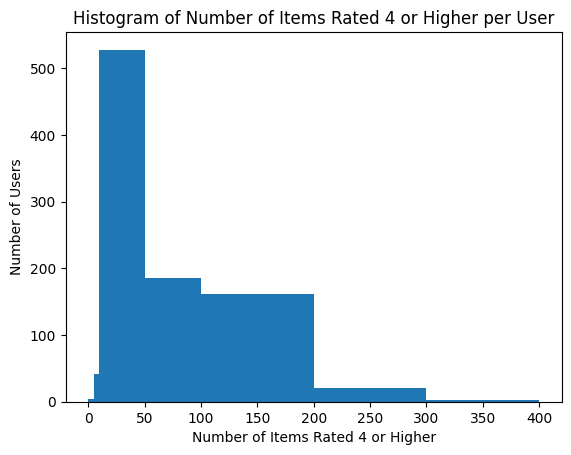

In [24]:
# Find total number of items rated 4 or higher by user in filtered df and plot a histogram with customized bins (taking a list as input)

# Find total number of items rated 4 or higher by user in filtered df
high_rated_items_count = filtered_df[filtered_df['rating'] >= 4].groupby('user_id')['item_id'].count()

# Define custom bins for the histogram
bins = [0, 5, 10, 50, 100, 200, 300, 400]

# Plot the histogram
plt.hist(high_rated_items_count, bins=bins)

# Add labels and title
plt.xlabel('Number of Items Rated 4 or Higher')
plt.ylabel('Number of Users')
plt.title('Histogram of Number of Items Rated 4 or Higher per User')

# Display the plot
plt.show()

In [25]:
high_rated_items_count

user_id
1      162
2       40
3       15
4       19
5       58
      ... 
939     39
940     57
941     18
942     66
943     96
Name: item_id, Length: 942, dtype: int64

In [26]:
# filter all interactions from filtered_df such that the ratings are 4 or higher.

# Filter interactions with ratings of 4 or higher
high_rated_interactions = filtered_df[filtered_df['rating'] >= 4]

# Print the size of the filtered DataFrame
print("Size of DataFrame with high ratings:", high_rated_interactions.size)


Size of DataFrame with high ratings: 220660


In [27]:
high_rated_interactions.head()

user_id  item_id  rating  timestamp
5       298      474       4  884182806
7       253      465       5  891628467
11      286     1014       5  879781125
12      200      222       5  876042340
16      122      387       5  879270459

In [28]:
# convert the timestamp to a readable format - dd/mm/yyyy

from datetime import datetime

# Assuming 'timestamp' column contains Unix timestamps
high_rated_interactions['readable_timestamp'] = high_rated_interactions['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime('%d/%m/%Y'))

# Display the DataFrame with the new column
print(high_rated_interactions.head())

    user_id  item_id  rating  timestamp readable_timestamp
5       298      474       4  884182806         07/01/1998
7       253      465       5  891628467         03/04/1998
11      286     1014       5  879781125         17/11/1997
12      200      222       5  876042340         05/10/1997
16      122      387       5  879270459         11/11/1997


<ipython-input-28-5e1772113e64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_interactions['readable_timestamp'] = high_rated_interactions['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime('%d/%m/%Y'))


In [29]:

# Convert timestamp to datetime objects
high_rated_interactions['datetime'] = pd.to_datetime(high_rated_interactions['timestamp'], unit='s')

# Extract year and month
high_rated_interactions['year_month'] = high_rated_interactions['datetime'].dt.to_period('M')

# Group by user_id and year_month, count interactions
user_monthly_interactions = high_rated_interactions.groupby(['user_id', 'year_month'])['item_id'].count()

# Filter out user-month combinations with less than 5 interactions
filtered_user_monthly_interactions = user_monthly_interactions[user_monthly_interactions >= 5]

# Get the indices (user_id, year_month) of the filtered interactions
filtered_indices = filtered_user_monthly_interactions.index

# Filter the original high_rated_interactions DataFrame based on the filtered indices
filtered_high_rated_interactions = high_rated_interactions.set_index(['user_id', 'year_month']).loc[filtered_indices].reset_index()

# Now filtered_high_rated_interactions contains only interactions where each user has at least 5 interactions every month
print("Size of DataFrame with high ratings and at least 5 interactions per user per month:", filtered_high_rated_interactions.size)
filtered_high_rated_interactions.head()

<ipython-input-29-5c669ca9b674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_interactions['datetime'] = pd.to_datetime(high_rated_interactions['timestamp'], unit='s')
<ipython-input-29-5c669ca9b674>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_interactions['year_month'] = high_rated_interactions['datetime'].dt.to_period('M')


Size of DataFrame with high ratings and at least 5 interactions per user per month: 382354


user_id year_month  item_id  rating  timestamp readable_timestamp  \
0        1    1997-09      160       4  875072547         24/09/1997   
1        1    1997-09      202       5  875072442         24/09/1997   
2        1    1997-09       47       4  875072125         24/09/1997   
3        1    1997-09      253       5  874965970         22/09/1997   
4        1    1997-09       64       5  875072404         24/09/1997   

             datetime  
0 1997-09-24 03:42:27  
1 1997-09-24 03:40:42  
2 1997-09-24 03:35:25  
3 1997-09-22 22:06:10  
4 1997-09-24 03:40:04

In [30]:
filtered_high_rated_interactions.size

382354

In [31]:

# Create a mapping from old item IDs to new consecutive IDs
old_to_new_item_id = {}
new_item_id = 1

# Iterate through unique item IDs in the filtered DataFrame
for item_id in filtered_high_rated_interactions['item_id'].unique():
  if item_id not in old_to_new_item_id:
    old_to_new_item_id[item_id] = new_item_id
    new_item_id += 1

# Create a new column with the new consecutive item IDs
filtered_high_rated_interactions['new_item_id'] = filtered_high_rated_interactions['item_id'].map(old_to_new_item_id)

# Now you have a DataFrame with both the old and new item IDs, and the mapping is stored in old_to_new_item_id
print(filtered_high_rated_interactions.head())

   user_id year_month  item_id  rating  timestamp readable_timestamp  \
0        1    1997-09      160       4  875072547         24/09/1997   
1        1    1997-09      202       5  875072442         24/09/1997   
2        1    1997-09       47       4  875072125         24/09/1997   
3        1    1997-09      253       5  874965970         22/09/1997   
4        1    1997-09       64       5  875072404         24/09/1997   

             datetime  new_item_id  
0 1997-09-24 03:42:27            1  
1 1997-09-24 03:40:42            2  
2 1997-09-24 03:35:25            3  
3 1997-09-22 22:06:10            4  
4 1997-09-24 03:40:04            5  


In [32]:

# Count the number of unique items in filtered_high_rated_interactions
num_unique_items = filtered_high_rated_interactions['item_id'].nunique()

print("Total number of unique items in filtered_high_rated_interactions:", num_unique_items)

Total number of unique items in filtered_high_rated_interactions: 1301


In [34]:
filtered_high_rated_interactions.head()

user_id year_month  item_id  rating  timestamp readable_timestamp  \
0        1    1997-09      160       4  875072547         24/09/1997   
1        1    1997-09      202       5  875072442         24/09/1997   
2        1    1997-09       47       4  875072125         24/09/1997   
3        1    1997-09      253       5  874965970         22/09/1997   
4        1    1997-09       64       5  875072404         24/09/1997   

             datetime  new_item_id  
0 1997-09-24 03:42:27            1  
1 1997-09-24 03:40:42            2  
2 1997-09-24 03:35:25            3  
3 1997-09-22 22:06:10            4  
4 1997-09-24 03:40:04            5

In [36]:
# Split each interaction from filtered_high_rated_interactions monthwise and store them in different periods
monthly_interactions = {}
unique_months = sorted(filtered_high_rated_interactions['year_month'].unique())
for i, month in enumerate(unique_months):
  month_data = filtered_high_rated_interactions[filtered_high_rated_interactions['year_month'] == month]
  interactions = [(row['user_id'], row['new_item_id']) for _, row in month_data.iterrows()]
  monthly_interactions[f"period_{i+1}"] = interactions


In [38]:
for key, value in monthly_interactions.items():
  print(f"Key: {key}, Size of value: {len(value)}")

Key: period_1, Size of value: 3709
Key: period_2, Size of value: 5907
Key: period_3, Size of value: 13499
Key: period_4, Size of value: 6722
Key: period_5, Size of value: 7143
Key: period_6, Size of value: 5641
Key: period_7, Size of value: 6902
Key: period_8, Size of value: 5099


In [40]:
# Save the user-movie interactions for each period in a .txt file for movielens 100k

import os

# Create the directory if it doesn't exist
directory = "ADER/data/MOVIELENS100K/"
if not os.path.exists(directory):
    os.makedirs(directory)

for key, value in monthly_interactions.items():
  file_path = os.path.join(directory, f"{key}.txt")
  with open(file_path, "w") as f:
    for user_id, item_id in value:
      f.write(f"{user_id} {item_id}\n")


In [41]:
%cd /content/ADER

/content/ADER


In [42]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.0 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of scipy 

In [43]:
!pip install --upgrade pip setuptools wheel
!pip install numpy --only-binary=:all:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [44]:
!pip install tqdm==4.40.2
!pip install tensorflow-determinism==0.3.0

  Using cached tqdm-4.40.2-py2.py3-none-any.whl.metadata (48 kB)
Using cached tqdm-4.40.2-py2.py3-none-any.whl (55 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.6
    Uninstalling tqdm-4.66.6:
      Successfully uninstalled tqdm-4.66.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires tqdm>=4.64.1, but you have tqdm 4.40.2 which is incompatible.
huggingface-hub 0.26.5 requires tqdm>=4.42.1, but you have tqdm 4.40.2 which is incompatible.
  Using cached tensorflow_determinism-0.3.0-py3-none-any.whl


In [45]:
!pip install --upgrade pip setuptools wheel
!pip install numpy --only-binary=:all:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstall

In [47]:
%pwd

'/content/ADER'

In [49]:
%cd /content/ADER

/content/ADER


In [48]:
!cp ../main_test.py ./main.py

In [ ]:
!python main.py --dataset=MOVIELENS100K --joint=True --save_dir=joint_all_previous_periods_evaluation

Streaming output truncated to the last 5000 lines.
  save/Assign_64 (Assign) /device:GPU:0
  save/Assign_65 (Assign) /device:GPU:0
  Adam_1/update_SASRec/num_blocks_1/ln_1/Variable_1/ApplyAdam (ApplyAdam) /device:GPU:0
  save_1/Assign_63 (Assign) /device:GPU:0
  save_1/Assign_64 (Assign) /device:GPU:0
  save_1/Assign_65 (Assign) /device:GPU:0
  Adam_2/update_SASRec/num_blocks_1/ln_1/Variable_1/ApplyAdam (ApplyAdam) /device:GPU:0
  save_2/Assign_63 (Assign) /device:GPU:0
  save_2/Assign_64 (Assign) /device:GPU:0
  save_2/Assign_65 (Assign) /device:GPU:0
  Adam_3/update_SASRec/num_blocks_1/ln_1/Variable_1/ApplyAdam (ApplyAdam) /device:GPU:0
  save_3/Assign_63 (Assign) /device:GPU:0
  save_3/Assign_64 (Assign) /device:GPU:0
  save_3/Assign_65 (Assign) /device:GPU:0
  Adam_4/update_SASRec/num_blocks_1/ln_1/Variable_1/ApplyAdam (ApplyAdam) /device:GPU:0
  save_4/Assign_63 (Assign) /device:GPU:0
  save_4/Assign_64 (Assign) /device:GPU:0
  save_4/Assign_65 (Assign) /device:GPU:0

2024-12-09 1

In [ ]:
!python main.py --dataset=MOVIELENS100K --fix_lambda=True --save_dir=fix_lambda --save_dir=ader-fixed-lambda-ablation

Streaming output truncated to the last 5000 lines.
  Adam_3/update_SASRec/num_blocks_1/self_attention/dense/bias/ApplyAdam (ApplyAdam) /device:GPU:0
  save_3/Assign_78 (Assign) /device:GPU:0
  save_3/Assign_79 (Assign) /device:GPU:0
  save_3/Assign_80 (Assign) /device:GPU:0
  Adam_4/update_SASRec/num_blocks_1/self_attention/dense/bias/ApplyAdam (ApplyAdam) /device:GPU:0
  save_4/Assign_78 (Assign) /device:GPU:0
  save_4/Assign_79 (Assign) /device:GPU:0
  save_4/Assign_80 (Assign) /device:GPU:0

2024-12-08 17:21:44.747815: W tensorflow/core/common_runtime/colocation_graph.cc:1214] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported d

In [ ]:
!python main.py --dataset=MOVIELENS100K --disable_distillation=True --selection=random --save_dir=ER-random-ablation

Streaming output truncated to the last 5000 lines.
  save_4/Assign_79 (Assign) /device:GPU:0
  save_4/Assign_80 (Assign) /device:GPU:0

2024-12-02 17:34:50.510910: W tensorflow/core/common_runtime/colocation_graph.cc:1214] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
ApplyAdam: CPU 
Fill: CPU 
Identity: CPU 
Assign: CPU 
VariableV2: CPU 
Mul: CPU 
Sub: CPU 
AddV2: CPU 
RandomUniform: CPU 
Const: CPU 

Colocation members, us

In [ ]:
!python main.py --dataset=MOVIELENS100K --lambda_ 0.5 --ewc=True --save_dir=ewc-lambda0.5-ablation

Streaming output truncated to the last 5000 lines.
  save_3/Assign_28 (Assign) /device:GPU:0
  save_3/Assign_29 (Assign) /device:GPU:0
  Adam_4/update_SASRec/num_blocks_0/multihead_attention/conv1d/kernel/ApplyAdam (ApplyAdam) /device:GPU:0
  save_4/Assign_27 (Assign) /device:GPU:0
  save_4/Assign_28 (Assign) /device:GPU:0
  save_4/Assign_29 (Assign) /device:GPU:0

2024-12-03 00:39:58.132015: W tensorflow/core/common_runtime/colocation_graph.cc:1214] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_

In [ ]:
!python main.py --dataset=MOVIELENS100K --lambda_ 0.7 --ewc=True --save_dir=ewc-lambda0.7_test-ablation

Streaming output truncated to the last 5000 lines.
  SASRec/num_blocks_1/ln_1/Variable/Adam (VariableV2) /device:GPU:0
  SASRec/num_blocks_1/ln_1/Variable/Adam/Assign (Assign) /device:GPU:0
  SASRec/num_blocks_1/ln_1/Variable/Adam/read (Identity) /device:GPU:0
  SASRec/num_blocks_1/ln_1/Variable/Adam_1/Initializer/zeros (Const) /device:GPU:0
  SASRec/num_blocks_1/ln_1/Variable/Adam_1 (VariableV2) /device:GPU:0
  SASRec/num_blocks_1/ln_1/Variable/Adam_1/Assign (Assign) /device:GPU:0
  SASRec/num_blocks_1/ln_1/Variable/Adam_1/read (Identity) /device:GPU:0
  Adam/update_SASRec/num_blocks_1/ln_1/Variable/ApplyAdam (ApplyAdam) /device:GPU:0
  save/Assign_60 (Assign) /device:GPU:0
  save/Assign_61 (Assign) /device:GPU:0
  save/Assign_62 (Assign) /device:GPU:0
  Adam_1/update_SASRec/num_blocks_1/ln_1/Variable/ApplyAdam (ApplyAdam) /device:GPU:0
  save_1/Assign_60 (Assign) /device:GPU:0
  save_1/Assign_61 (Assign) /device:GPU:0
  save_1/Assign_62 (Assign) /device:GPU:0
  Adam_2/update_SASRec/n

In [ ]:
!python main.py --dataset=MOVIELENS100K --disable_distillation=True --save_dir=ER-herding-ablation

Streaming output truncated to the last 5000 lines.
  save_4/Assign_79 (Assign) /device:GPU:0
  save_4/Assign_80 (Assign) /device:GPU:0

2024-12-02 08:46:14.824433: W tensorflow/core/common_runtime/colocation_graph.cc:1214] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
ApplyAdam: CPU 
Fill: CPU 
Identity: CPU 
Assign: CPU 
VariableV2: CPU 
Mul: CPU 
Sub: CPU 
AddV2: CPU 
RandomUniform: CPU 
Const: CPU 

Colocation members, us

In [ ]:
!python main.py --dataset=MOVIELENS100K --exemplar_size=20000 --save_dir=exemplar20k

Streaming output truncated to the last 5000 lines.
  Adam_3/update_SASRec/num_blocks_1/self_attention/dense/bias/ApplyAdam (ApplyAdam) /device:GPU:0
  save_3/Assign_78 (Assign) /device:GPU:0
  save_3/Assign_79 (Assign) /device:GPU:0
  save_3/Assign_80 (Assign) /device:GPU:0
  Adam_4/update_SASRec/num_blocks_1/self_attention/dense/bias/ApplyAdam (ApplyAdam) /device:GPU:0
  save_4/Assign_78 (Assign) /device:GPU:0
  save_4/Assign_79 (Assign) /device:GPU:0
  save_4/Assign_80 (Assign) /device:GPU:0

2024-12-02 23:19:46.470907: W tensorflow/core/common_runtime/colocation_graph.cc:1214] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
  /job:localhost/replica:0/task:0/device:CPU:0].
See below for details of this colocation group:
Colocation Debug Info:
Colocation group had the following types and supported d

In [ ]:
# !python main.py --dataset=MOVIELENS100K --lambda_=1.0 --batch_size=128 --test_batch=64 --disable_distillation=True --save_dir=ER-herding

2024-12-02 07:23:42.867429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
/content/ADER/ADER.py:55: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.layers.dropout(self.seq,
/content/ADER/modules.py:172: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/content/ADER/modules.py:173: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/content/ADER/modules.py:174: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use 

In [ ]:
!python main.py --ewc=True --save_dir=ewc --dataset=MOVIELENS100K --batch_size=512

2024-12-02 06:48:33.120660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
non-resource variables are not supported in the long term
/content/ADER/EWC.py:57: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.layers.dropout(self.seq,
/content/ADER/modules.py:172: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/content/ADER/modules.py:173: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/content/ADER/modules.py:174: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `